## Logistic Regression

Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:
* ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0 

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. This prediction rule is common to all linear models for classification.

 For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
cancer = load_breast_cancer()

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) 

In [44]:
logreg = LogisticRegression().fit(X_train, y_train) 

In [45]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


 Training and test set performance are very close, it is likely that we are underfitting

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regilarization. In other words, when you use a high value for the parameter C, Logis ticRegression and LinearSVC try to fit the training set as best as possible, using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly.   

In [46]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

In [47]:
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


We can also investigate what happens if we use an even more regularized model than the default of C=1, by setting C=0.01:

In [48]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


Using C=100 results in higher training set accuracy, and also a slightly increased test set accuracy.

Finally, let’s look at the coefficients learned by the models with the three different settings of the regularization parameter C.

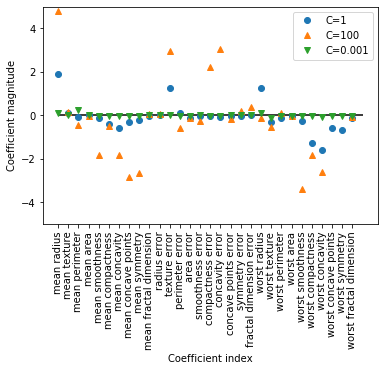

In [49]:
plt.plot(logreg.coef_.T, 'o', label="C=1") 
plt.plot(logreg100.coef_.T, '^', label="C=100") 
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1]) 
plt.ylim(-5, 5) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()